In [508]:
# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# Data seems clean

In [509]:
# column name list for the dataset
names = ['date','avg_temp','min_temp', 'max_temp', 'avg_min_temp','avg_max_temp',
         'lowest_temp', 'highest_temp', 'amount_of_rain','avg_amount','highest_amount_of_rain']
         
url = 'https://raw.githubusercontent.com/Jpaku93/Forecast_Time_Series/main/Weather.csv?token=GHSAT0AAAAAABUODZTDCCUMO6HP4ZXITPAKYVWCHLA'
df = pd.read_csv(url, names=names)

HTTPError: ignored

# Observe rain amounts

Set up the names for plotting purposes

In [510]:
import calendar
weather = df.copy()
date = weather.date.str.split('/',expand = True)
# split the month string and retreive the months
weather.insert(loc=1, column='month', value= date.iloc[:,1])
# replace the zero and convert string to integer
weather['month'] = date.iloc[:,1].astype(int)
weather['month'] = weather['month'].apply(lambda x: calendar.month_abbr[x])
# preview month names 
weather.month.unique()

array(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

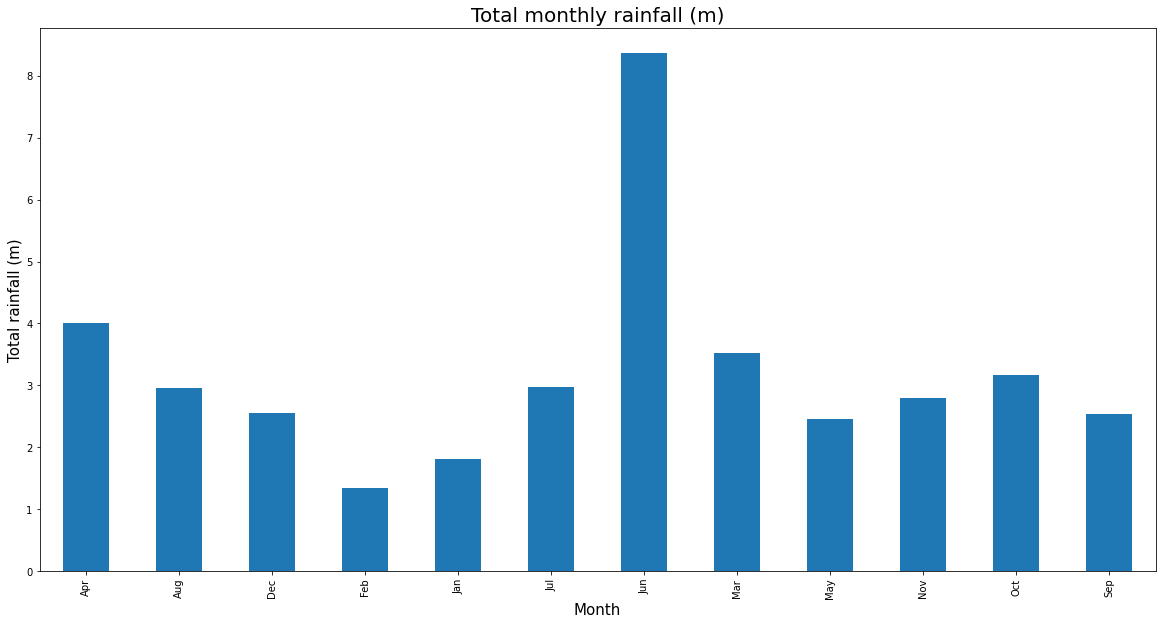

In [511]:
# Yearly rainfall pattern
weather.groupby(["month"])['amount_of_rain'].sum().plot(kind="bar", figsize=(20, 10))

# plot aesthetics
plt.title('Total monthly rainfall (m)', fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total rainfall (m)", fontsize=15)

plt.show()

Jun already looks like an anomaly so the next observation will look at daily values

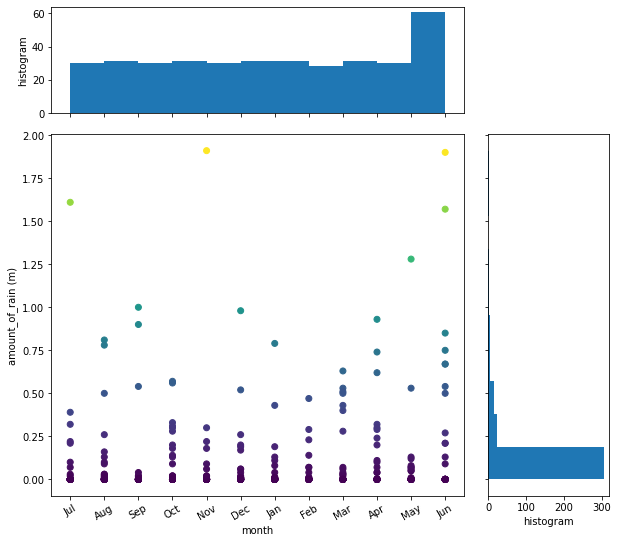

In [512]:
# grid specificss
gs = GridSpec(4,4)
# plot size specifics
fig = plt.figure(figsize=(10,9))
# subplot main scatter plot
ax_joint = fig.add_subplot(gs[1:4,0:3])
# subplot top histogram
ax_marg_x = fig.add_subplot(gs[0,0:3])
# subplot side histogram
ax_marg_y = fig.add_subplot(gs[1:4,3])
# plot scatter plot with amount of during the day in months
ax_joint.scatter(weather['month'], weather['amount_of_rain'], c= weather['amount_of_rain'])
# set up histograms
ax_marg_x.hist(weather['month'],bins=11)
ax_marg_y.hist(weather['amount_of_rain'],orientation="horizontal")
    
# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)
plt.setp(ax_joint.get_xticklabels(), rotation= 30, visible=True)

# Set labels on joint
ax_joint.set_xlabel('month')
ax_joint.set_ylabel('amount_of_rain (m)')

# Set labels on marginals
ax_marg_y.set_xlabel('histogram')
ax_marg_x.set_ylabel('histogram')

# plt.savefig('Weather/Total_Rainfall_Days.jpg')

plt.show()

At a glance, you can tell where the outliers are in terms of unusual amounts of rain. 
June and November both have a day containing about 2 meters of rain.
Considering June has twice the volume of rain than every other months half of this volume is almost contained from two of the highest days.



Comparing the actual amount of rain on the day to the highest amount recorded on this day the line chart will show us more details of the daily action

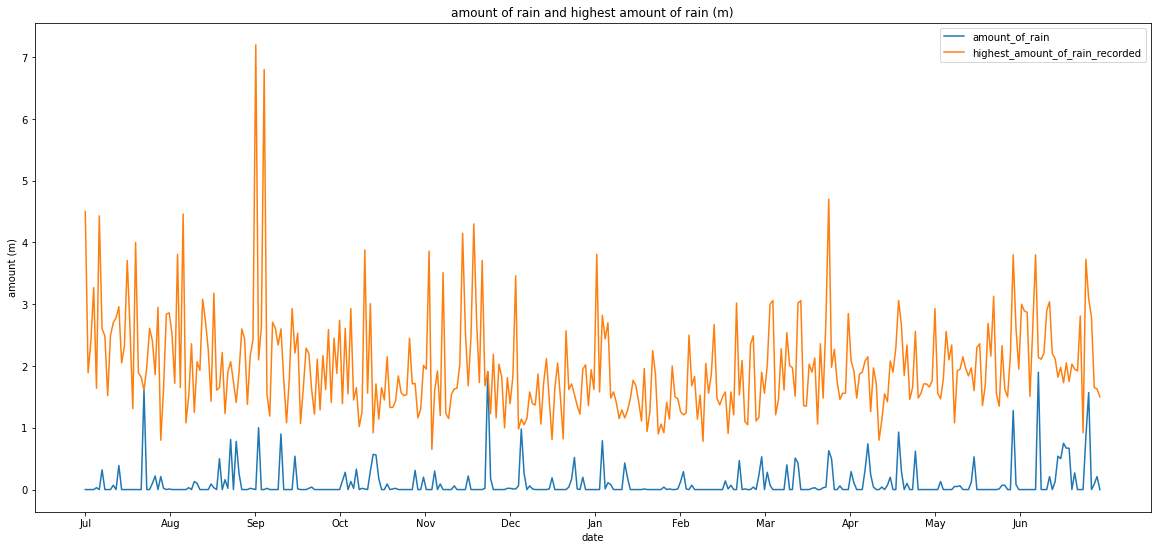

In [513]:
# figure size
plt.figure(figsize=(20,9))
# set up line plots 
plt.plot(weather['date'],weather['amount_of_rain'])
plt.plot(weather['date'],weather['highest_amount_of_rain'])
# set up plot asthetics
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('amount of rain and highest amount of rain (m)')
plt.legend(['amount_of_rain','highest_amount_of_rain_recorded'])
plt.xlabel('date'), plt.ylabel('amount (m)')

# plt.savefig('Weather/Maximum_rain_in_a_day.jpg')

plt.show()

Huge anomalies have occured through September, where the line touches implies that this day has achieved a record high. Otherwise June remains with the most and above average sized spikes from the amount of rain on the day.  

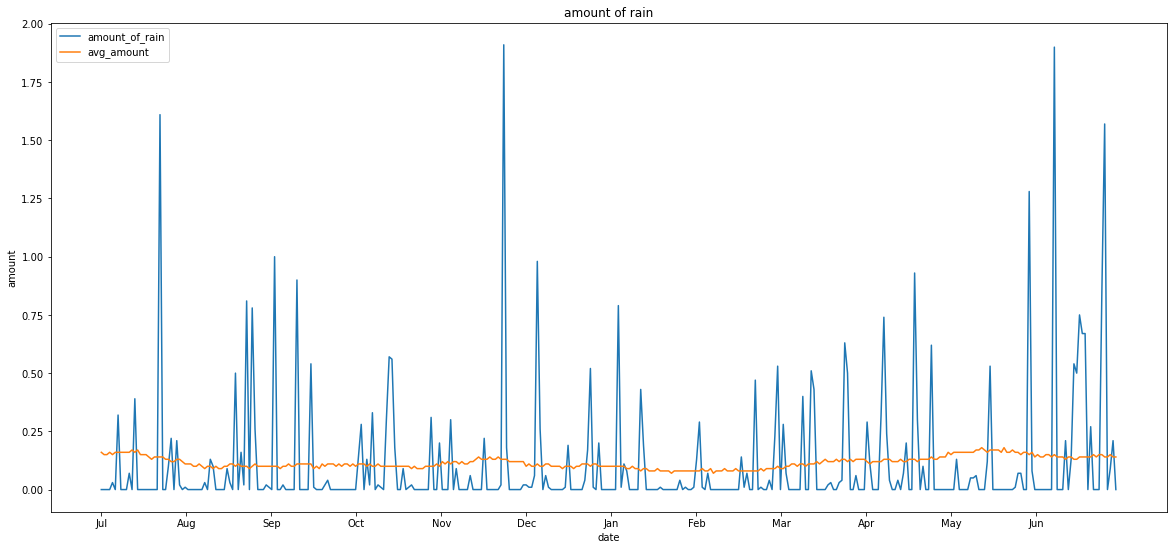

In [514]:
# Data is clean so an observation of some columns
plt.figure(figsize=(20,9))
plt.plot(weather['date'],weather['amount_of_rain'])
plt.plot(weather['date'],weather['avg_amount'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('amount of rain')
plt.legend(['amount_of_rain','avg_amount'])
plt.xlabel('date'), plt.ylabel('amount')
# save figure
# plt.savefig('Weather/Average_and_Amount.jpg')
plt.show()

In [515]:
# calculate the percentage of the highest amount of rain compared to the average 
print('the highest amount of rain in a day is proportionally', int(round(weather.iloc[145].amount_of_rain/weather.iloc[145].avg_amount,1)*10), 'times larger than the average amount of rain in the same day')

the highest amount of rain in a day is proportionally 14 times larger than the average amount of rain in the same day


so a threshold at least 8 or 10 times above the average proportion will be considered an anomoly in this case

In [516]:
# find the days higher than the average times 10
Ten_Times_The_Average = weather[df['amount_of_rain'] > weather['avg_amount'] * 10].sort_values('amount_of_rain',ascending = False)
Ten_Times_The_Average.sort_values('amount_of_rain',ascending = False)

,date,month,avg_temp,min_temp,max_temp,avg_min_temp,avg_max_temp,lowest_temp,highest_temp,amount_of_rain,avg_amount,highest_amount_of_rain,scores,anomaly
144,23/11/2014,Nov,50,44,55,32,48,1,73,1.91,0.13,1.91,-0.243069,-1
341,8/06/2015,Jun,70,60,79,60,80,44,95,1.90,0.15,2.14,-0.243069,-1
21,23/07/2014,Jul,69,62,76,66,85,46,102,1.61,0.14,1.61,-0.223427,-1
359,26/06/2015,Jun,71,66,76,65,85,49,102,1.57,0.14,3.09,-0.215917,-1


4 days were found, next find days above 8 times the average

In [517]:
# find the days higher than the average times 8
Eight_Times_The_Average = weather[weather['amount_of_rain'] > weather['avg_amount'] * 8]
Eight_Times_The_Average.sort_values('amount_of_rain',ascending = False)


,date,month,avg_temp,min_temp,max_temp,avg_min_temp,avg_max_temp,lowest_temp,highest_temp,amount_of_rain,avg_amount,highest_amount_of_rain,scores,anomaly
144,23/11/2014,Nov,50,44,55,32,48,1,73,1.91,0.13,1.91,-0.243069,-1
341,8/06/2015,Jun,70,60,79,60,80,44,95,1.90,0.15,2.14,-0.243069,-1
21,23/07/2014,Jul,69,62,76,66,85,46,102,1.61,0.14,1.61,-0.223427,-1
359,26/06/2015,Jun,71,66,76,65,85,49,102,1.57,0.14,3.09,-0.215917,-1
332,30/05/2015,May,75,66,84,57,77,37,94,1.28,0.15,3.80,-0.190700,-1
62,2/09/2014,Sep,72,65,79,62,82,45,100,1.00,0.10,2.10,-0.113249,-1
156,5/12/2014,Dec,37,34,40,27,42,8,70,0.98,0.11,1.14,-0.094016,-1
70,10/09/2014,Sep,75,67,82,59,80,40,96,0.90,0.11,2.60,-0.076921,-1
52,23/08/2014,Aug,79,70,88,64,84,46,96,0.81,0.10,2.07,-0.053143,-1


9 days are found


Here is the chart comparing the average rain amount to the amount of rain

In [518]:
weather_copy_8 = weather.copy()
weather_copy_8 = weather_copy_8.drop(Eight_Times_The_Average.index)


weather_copy_10 = weather.copy()
weather_copy_10 = weather_copy_10.drop(Ten_Times_The_Average.index)


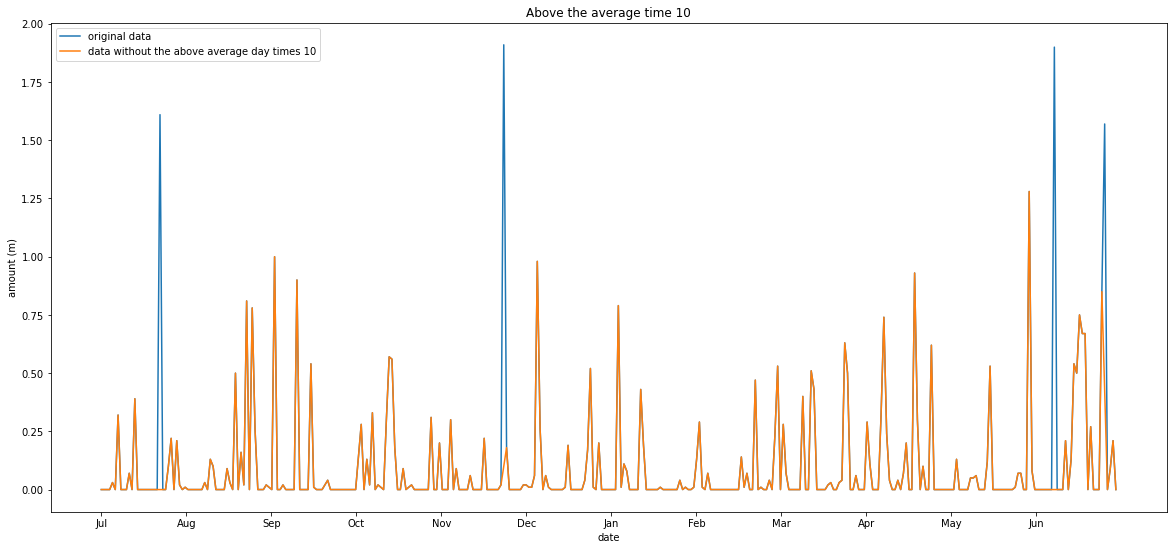

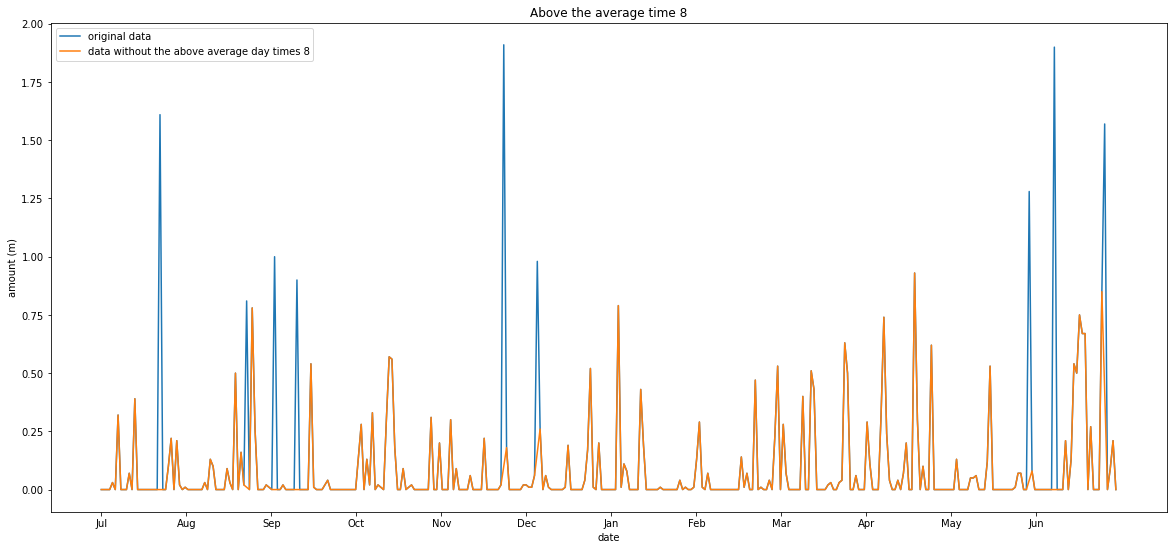

In [519]:
plt.figure(figsize=(20,9))
plt.plot(weather['date'],weather['amount_of_rain'])
plt.plot(weather_copy_10['date'],weather_copy_10['amount_of_rain'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('Above the average time 10')
plt.legend(['original data','data without the above average day times 10'])
plt.xlabel('date'), plt.ylabel('amount (m)')
plt.show()

plt.figure(figsize=(20,9))
plt.plot(weather['date'],weather['amount_of_rain'])
plt.plot(weather_copy_8['date'],weather_copy_8['amount_of_rain'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('Above the average time 8')
plt.legend(['original data','data without the above average day times 8'])
plt.xlabel('date'), plt.ylabel('amount (m)')
plt.show()

The ten looks more serious in the case that each day above 10 times the average are extremely rainy days compared to the *rest*

Another observation i am interested in is the average according to the amount of highest rain recorded compared to the actual amount of rain from the day

mean value 1.9909615384615387
median value 1.84
max value 7.2
max value 0.814933557874993
95% quantile 3.502499999999998


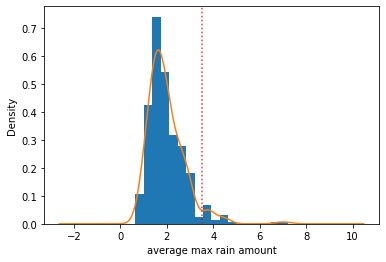

In [520]:
print('mean value', weather['highest_amount_of_rain'].mean())
print('median value', weather['highest_amount_of_rain'].median())
print('max value', weather['highest_amount_of_rain'].max())
print('max value', weather['highest_amount_of_rain'].std())


fig, ax = plt.subplots(figsize = (6,4))

# Plots #

weather['highest_amount_of_rain'].plot(kind = "hist", density = True, bins = 18) # change density to true, because KDE uses density
# Plot KDE
weather['highest_amount_of_rain'].plot(kind = "kde")

    # X #
ax.set_xlabel("average max rain amount")

quant = weather['highest_amount_of_rain'].quantile(0.95)
print('95% quantile', quant)
ax.axvline(quant, alpha = quant, ymax = quant, linestyle = ":" , color = 'red')
ax.axvline(quant, alpha = quant, ymax = quant, linestyle = ":" , color = 'red')

plt.show()


Out of all the max rain values recorded we could say that the average day can definately be considered extremely rainly as an average anomaly, but with dates ranging far above the 90% quatile, a serious storm has brewed signifying extreme anomolies

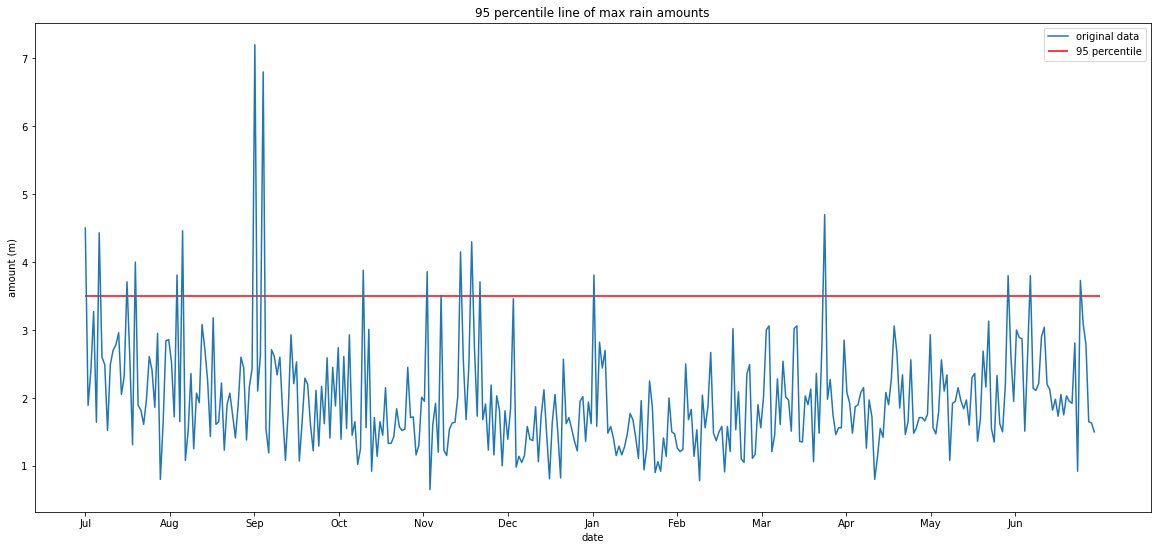

In [521]:
# figure size
plt.figure(figsize=(20,9))
# set up line plots 
plt.plot(weather['date'],weather['highest_amount_of_rain'])
plt.hlines(quant,0,365, color='red')
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('95 percentile line of max rain amounts')
plt.legend(['original data','95 percentile'])
plt.xlabel('date'), plt.ylabel('amount (m)')
plt.show()

I would also like to state that according to the frequency of days reaching an extreme rain amount above the 95 percentile mark storms are more common during the bottom half of the year June to December

# Isolation Forest Anomoly Detection for rain amounts

In [522]:
from sklearn.ensemble import IsolationForest

In [523]:
def Isolation_Forest_Model(X,n_estimators = 50,contamination = 0.1,max_features = 1.0):
  model=IsolationForest(n_estimators= n_estimators,max_samples='auto',
                        contamination=float(contamination),max_features=max_features)
  model.fit(X)
  data['scores']=model.decision_function(X)
  data['anomaly']=model.predict(X)
  anomaly=data.loc[data['anomaly']==-1]
  return anomaly

From this data these days can be considered anomalies

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


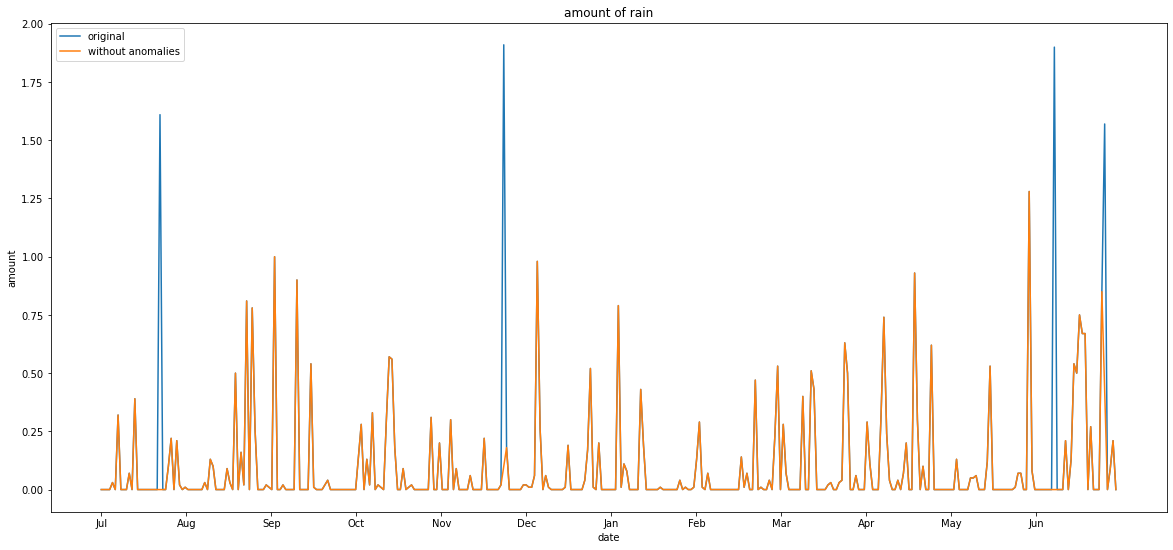

In [524]:
X = weather[['amount_of_rain']]

anomaly = Isolation_Forest_Model(X, 50, 0.009, 1.0)

# drop anomalies
temp = weather.copy()
temp = temp.drop(anomaly.index)

# set plot size
plt.figure(figsize=(20,9))
# set line graphs
plt.plot(weather['date'],weather['amount_of_rain'])
plt.plot(temp['date'],temp['amount_of_rain'])
# set plot asthetics
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('amount of rain')
plt.xlabel('date'), plt.ylabel('amount')
plt.legend(['original', 'without anomalies'])
# show plot
plt.show()

In [525]:
temp2 = weather.copy()
temp2 = temp2.drop(temp.index)
temp2

,date,month,avg_temp,min_temp,max_temp,avg_min_temp,avg_max_temp,lowest_temp,highest_temp,amount_of_rain,avg_amount,highest_amount_of_rain,scores,anomaly
21,23/07/2014,Jul,69,62,76,66,85,46,102,1.61,0.14,1.61,-0.223427,-1
144,23/11/2014,Nov,50,44,55,32,48,1,73,1.91,0.13,1.91,-0.243069,-1
341,8/06/2015,Jun,70,60,79,60,80,44,95,1.90,0.15,2.14,-0.243069,-1
359,26/06/2015,Jun,71,66,76,65,85,49,102,1.57,0.14,3.09,-0.215917,-1


Comparing our proportional average calculation of intense rainy days the Isolated forest also matched our top 4 days which were 10 times the average amount

# DB SCAN Anomoly Detection

In [526]:
from sklearn.cluster import DBSCAN

# Db scan takes two input columns
def DBSCAN_AD(data):
    # initialize dbscan algorythm
    dbscan=DBSCAN( )
    # fit the data 
    dbscan.fit(data)
    # visualize outputs
    DB_Clusters = dbscan.labels_
    # specify plot size
    plt.figure(figsize=(10,9))

    # set up main scatter plot
    plt.scatter(data.iloc[:,0],data.iloc[:,1], c= DB_Clusters)
    
    # Set labels on marginals
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])

    plt.show()

    return DB_Clusters

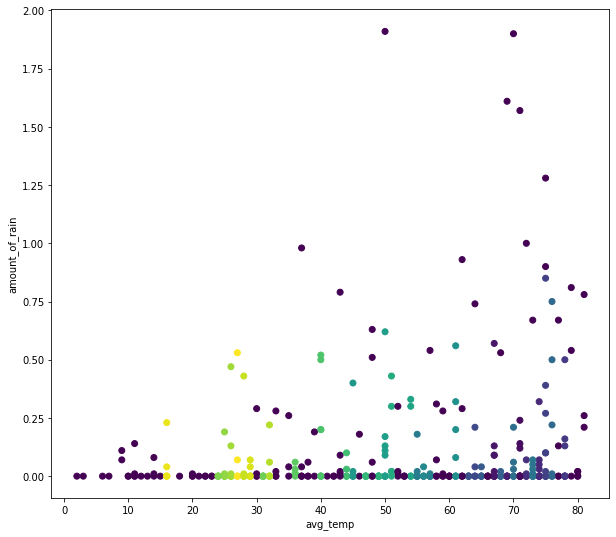

In [527]:
# compare anomalies according to the highest amount of rain
data = weather[['avg_temp', 'amount_of_rain']]

# run data through dbscan algorythm
db_clusters = DBSCAN_AD(data)

In [661]:
# copy main data and remove anomoly index 
db_temp = weather.copy()
db_temp['db_clusters'] = db_clusters
db_temp = db_temp[db_temp['db_clusters'] != -1]

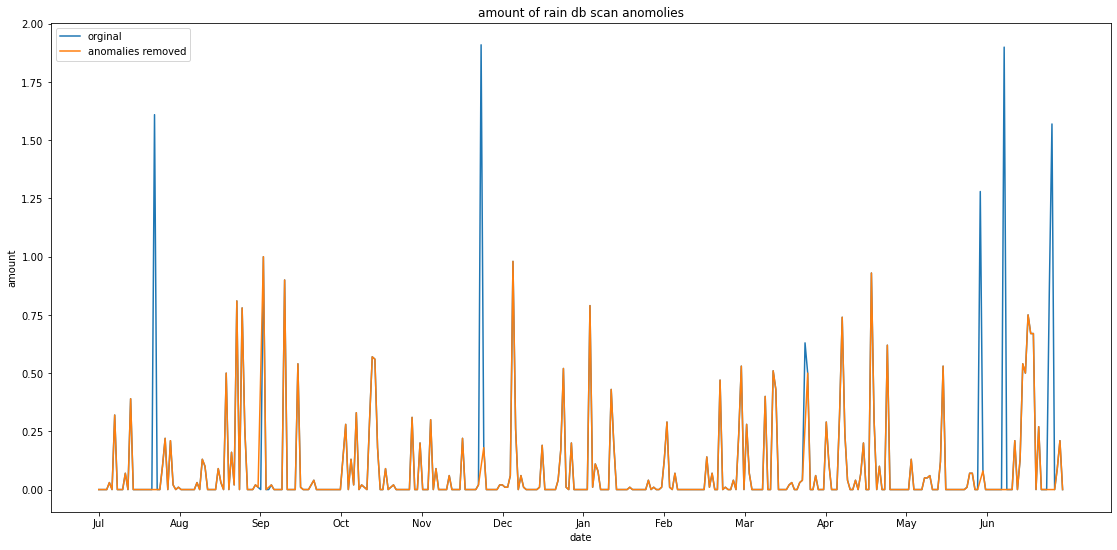

In [662]:
# plot the date and amount of rain with and without anomalies
plt.figure(figsize=(19,9))
plt.plot(weather['date'],weather['amount_of_rain'])
plt.plot(db_temp['date'],db_temp['amount_of_rain'])
# plot aesthetics
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('amount of rain db scan anomolies')
plt.xlabel('date'), plt.ylabel('amount')
plt.legend(['orginal', 'anomalies removed'])

plt.show()

According to this chart the average temp has significance to large amounts of rain in a day

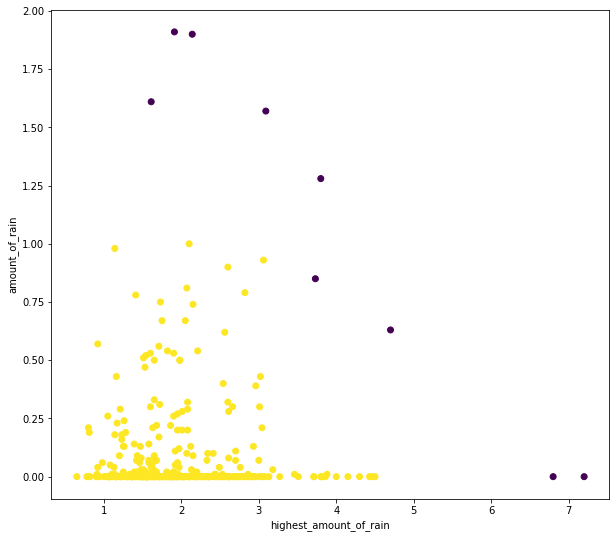

In [663]:
# compare anomalies according to the highest amount of rain
data = weather[['highest_amount_of_rain', 'amount_of_rain']]

# run data through dbscan algorythm
db_clusters = DBSCAN_AD(data)

In [664]:
# copy main data and remove anomoly index 
db_temp = df.copy()
db_temp['db_clusters'] = db_clusters
db_temp = db_temp[db_temp['db_clusters'] != -1]

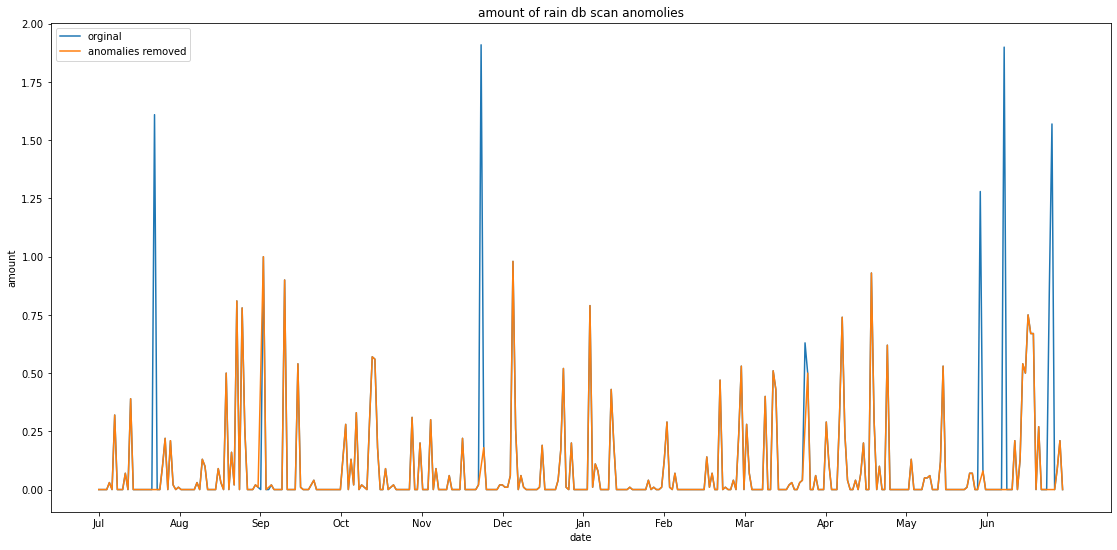

In [665]:
# plot the date and amount of rain with and without anomalies
plt.figure(figsize=(19,9))
plt.plot(df['date'],df['amount_of_rain'])
plt.plot(db_temp['date'],db_temp['amount_of_rain'])
# plot aesthetics
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('amount of rain db scan anomolies')
plt.xlabel('date'), plt.ylabel('amount')
plt.legend(['orginal', 'anomalies removed'])

plt.show()

Although the highest amount of rain doesnt seem uniform to compare with the actual amount of rain, an analisys of the db_scan anomolies shows the results we found with rain amounts 10 times above the average.

# Rainy Days vs Non Rainy Days

Lets look at the number of rainy days compared to the number of non rainy days

days without rain 224 , 62.0 %
days with rain 140 , 38.0 %


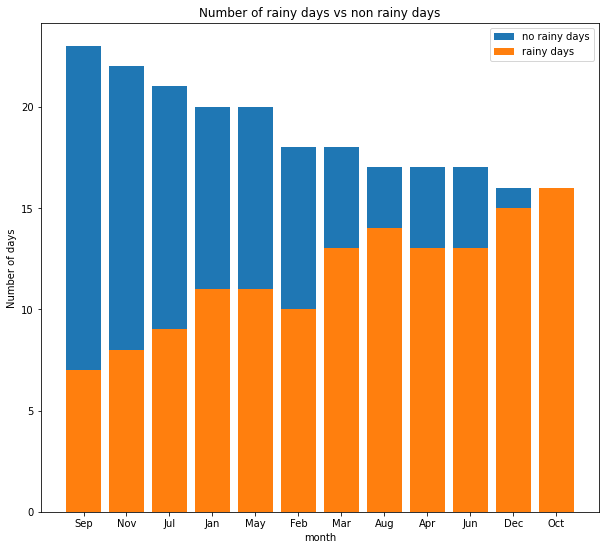

In [666]:
# Seperate the rain and no rain days
no_rain = weather[weather['amount_of_rain'] == 0]
rain = weather[weather['amount_of_rain'] > 0]

print('days without rain', len(no_rain),',', round((len(no_rain)/364)*100, 0), '%')
print('days with rain', len(rain),',', round((len(rain)/364)*100, 0), '%')


fig = plt.figure(figsize=(10,9))

# sum of rainy days per month
rain_count = rain.month.value_counts().to_frame()
no_rain_count = no_rain.month.value_counts().to_frame()

# set up bar plot
plt.bar(no_rain_count.index, no_rain_count.month, label = 'no rainy days')
plt.bar(rain_count.index, rain_count.month, label = 'rainy days')

# bar plot aesthetics
plt.xlabel("month")
plt.ylabel("Number of days")
plt.title("Number of rainy days vs non rainy days")
plt.legend()

# save fig
plt.show()

Just over a third of days during this 1 year period rained, Oct and Dec rained half the time 

In [667]:
rain_count.head(4)

,month
Oct,16
Dec,15
Aug,14
Mar,13


# Temperature

Observe temperature graphs and anomolies

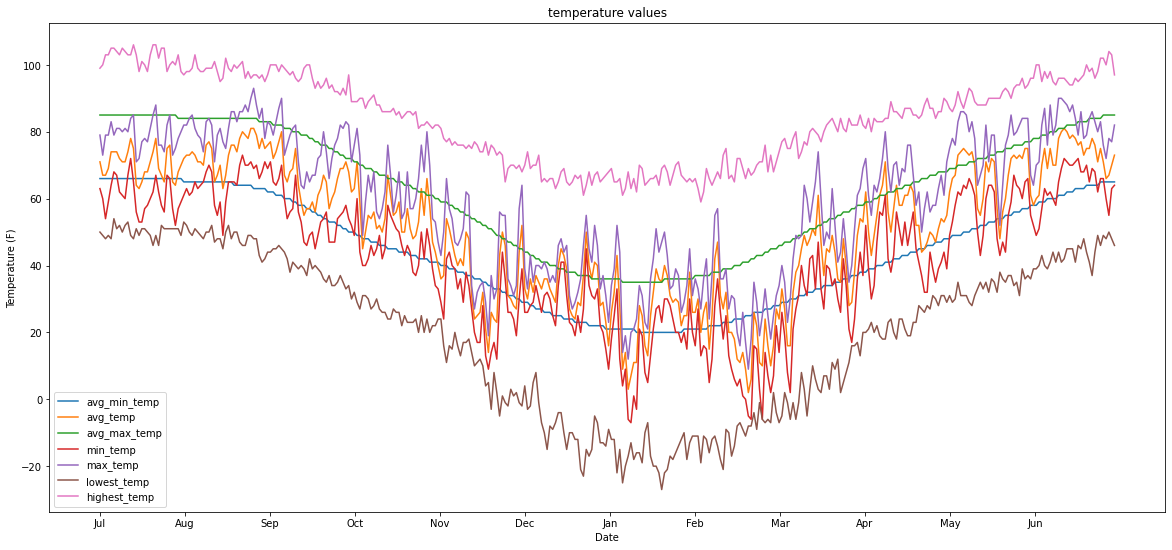

In [669]:
# Data is clean so an observation of some columns
plt.figure(figsize=(20,9))
plt.plot(weather['date'],weather['avg_min_temp'])
plt.plot(weather['date'],weather['avg_temp'])
plt.plot(weather['date'],weather['avg_max_temp'])
plt.plot(weather['date'],weather['min_temp'])
plt.plot(weather['date'],weather['max_temp'])
plt.plot(weather['date'],weather['lowest_temp'])
plt.plot(weather['date'],weather['highest_temp'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('temperature values')
plt.legend(['avg_min_temp','avg_temp','avg_max_temp','min_temp','max_temp','lowest_temp','highest_temp'])
plt.xlabel('Date'), plt.ylabel('Temperature (F)')
plt.show()

* Id like to say that the average max is a day stat giving an indication of day time temperature
* While the average low indicates a night time temperature

In any case the temperature will be first analyzed in the same fasion as the rain, and hopefully find a relationship considering rainy days here is a bar plot of the highest temperatures and lowest temperature in the months

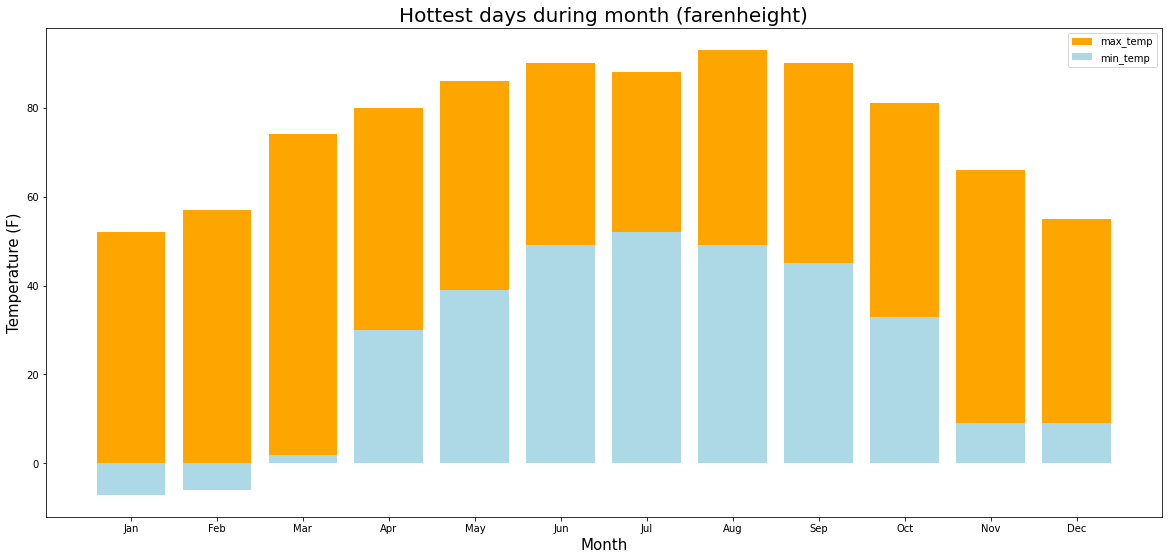

In [670]:
plt.figure(figsize=(20,9))
temp = weather.groupby(["month"])['max_temp'].max().to_frame()

temp['min_temp'] = weather.groupby(["month"])['min_temp'].min().to_frame()
month_idx=[]
for i in temp.index:
  month_idx.append(list(calendar.month_abbr).index(i))
temp['month_idx'] = month_idx 
temp = temp.sort_values('month_idx')
plt.bar(temp.index,temp['max_temp'], label = 'max_temp',color='orange')
plt.bar(temp.index,temp['min_temp'], label = 'min_temp',color='lightblue')

# bar plot aesthetic
plt.title('Hottest days during month (farenheight)', fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)
plt.legend()
# save fig
plt.show()


from the shape of the chart we can see that may to October is the hotter season. I would like to observe the changes in a day between the high and low temperature

lowest temp -7
max temp 93
during the year
32 degrees is the largest temperature change in a day
3 degrees is the smallest temperature change in a day


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


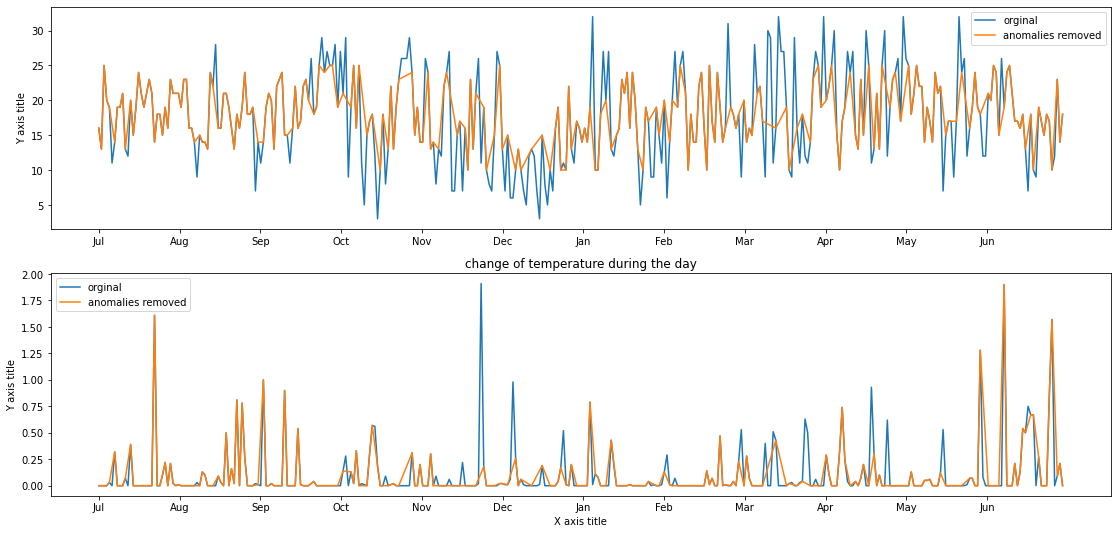

In [701]:
print('lowest temp' , weather.min_temp.min())
print('max temp' , weather.max_temp.max())
print('during the year')

dif = []
ttemp = weather.copy()
ttemp['Min_Max_dif'] = weather.max_temp - weather.min_temp
# get highest and lowest range of day temperatures
print(ttemp.Min_Max_dif.max(),'degrees is the largest temperature change in a day')
print(ttemp.Min_Max_dif.min(),'degrees is the smallest temperature change in a day')

anomaly_df = Isolation_Forest_Model(ttemp[['Min_Max_dif']],100,0.3,1.0)
temp_copy = ttemp.copy()
temp_copy = temp_copy.drop(anomaly_df.index)

plt.figure(figsize=(19,9))

plt.subplot(211)
plt.plot(ttemp['date'],ttemp['Min_Max_dif'])
plt.plot(temp_copy['date'],temp_copy['Min_Max_dif'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.ylabel('Y axis title')
plt.legend(['orginal', 'anomalies removed'])

plt.subplot(212)
plt.plot(ttemp['date'],ttemp['amount_of_rain'])
plt.plot(temp_copy['date'],temp_copy['amount_of_rain'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('change of temperature during the day')
plt.xlabel('X axis title'), plt.ylabel('Y axis title')
plt.legend(['orginal', 'anomalies removed'])

plt.show()

Not all that great but one more test with db scan

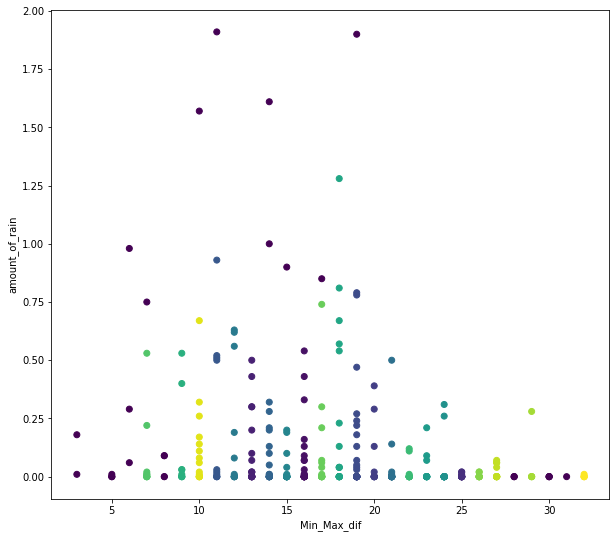

In [707]:
data = ttemp[['Min_Max_dif', 'amount_of_rain']]
db_clusters = DBSCAN_AD(data)
ttemp['db_clusters'] = db_clusters
anomalies_removed = ttemp[ttemp['db_clusters'] != -1]

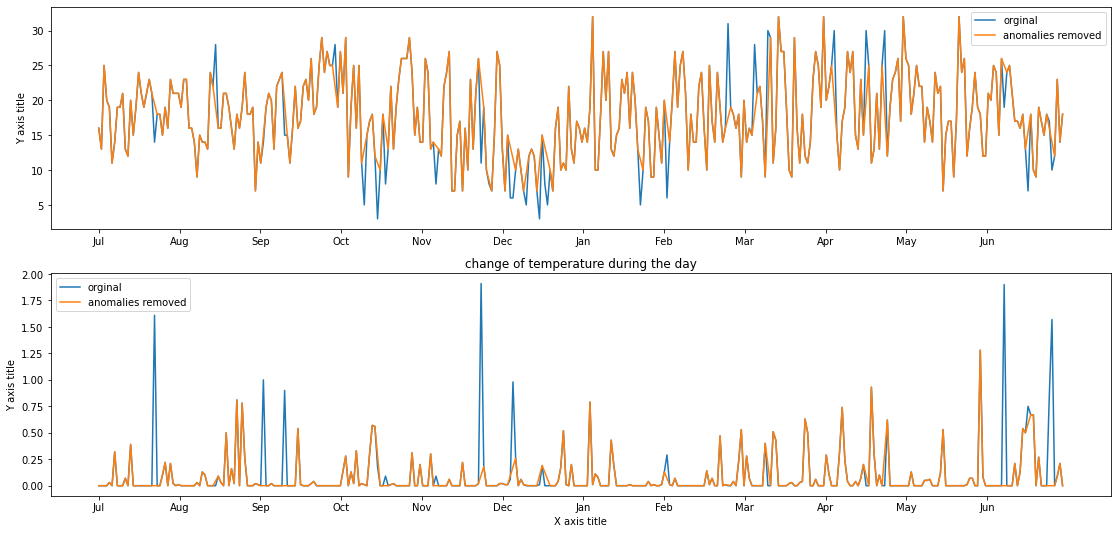

In [708]:
plt.figure(figsize=(19,9))

plt.subplot(211)
plt.plot(ttemp['date'],ttemp['Min_Max_dif'])
plt.plot(anomalies_removed['date'],anomalies_removed['Min_Max_dif'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.ylabel('Y axis title')
plt.legend(['orginal', 'anomalies removed'])

plt.subplot(212)
plt.plot(ttemp['date'],ttemp['amount_of_rain'])
plt.plot(anomalies_removed['date'],anomalies_removed['amount_of_rain'])
plt.xticks(np.linspace(0,365,13)[:-1], ('Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'))
plt.title('change of temperature during the day')
plt.xlabel('X axis title'), plt.ylabel('Y axis title')
plt.legend(['orginal', 'anomalies removed'])

plt.show()

Thats more like it, the change in temperature anomalies should definately show some results of rain amounts i believe. So maybe a prediction of temperature anomalies may possibly indicate an extremely rainy day.